Abgabe 2 Mark Nagengast Porro, Tim Schwabe

Aufgabe 1

In [1305]:
import networkx as nx
import numpy as np
import matplotlib as plt
import operator


In [1306]:
alpha = 1

In [1307]:
def createGraph(n_nodes, n_edges):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0,n_nodes)])

    for n in range(n_edges):
        a = np.random.randint(n_nodes)
        while True:
            b = np.random.randint(n_nodes)
            if a != b:
                break
        G.add_edge(a,b)
    
    return G


G = createGraph(50,200)


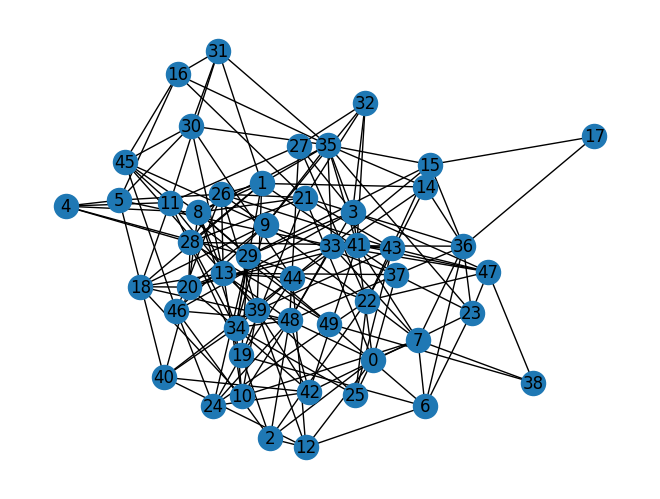

In [1308]:
nx.draw(G, with_labels = True)

Aufgabe 2

In [1309]:
#Init population 
def init_population(G):
    nodes = list(G.nodes())
    np.random.shuffle(nodes)
    dic = dict()
    for i in nodes:
        dic.update([((len(G.nodes())-i,),0)])
    
    return dic

In [1310]:
#Fitness with penalty
def fitness(population, G):
    fitness = 0

    for key in population:
        fitness = 0
        for i in range(len(key)-1):
            for j in range(i+1,len(key)):
                if G.has_edge(key[i], key[j]):
                    fitness += 1
                else: 
                    fitness -= alpha*len(key)
                    
        population.update([(key, fitness)])


Aufgabe 3

In [1311]:
# Selektion

def selection(population,G):
    return dict(sorted(population.items(),key=operator.itemgetter(1),reverse=True)[:(len(G.nodes())*4)])


In [1312]:
# Rekombination
def recombination(pop):
    new_pop = dict()
    for i in range(len(pop)-1):
        for j in range(i+1,len(pop)):
            appended = list(set(list(pop)[i] + list(pop)[j]))
            while len(appended) > max(len(list(pop)[i]), len(list(pop)[j])) + 1:
                random_idx = np.random.choice(len(appended))
                del appended[random_idx]
            appended = tuple(appended)
            new_pop.update([(appended,0)])
    return new_pop

In [1313]:
#Mutation:
def mutation(dic,G):
    newDic = dict()
    for key in dic:
        newKey = list(key)
        #removing nodes
        for node in newKey:
            node = np.round(node + np.random.normal(0,2,1))
            if node < 0:
                node = 0
            if node > len(G.nodes()):
                node = len(G.nodes())
        newDic.update([(tuple(set(newKey)),0)])
    
    return newDic

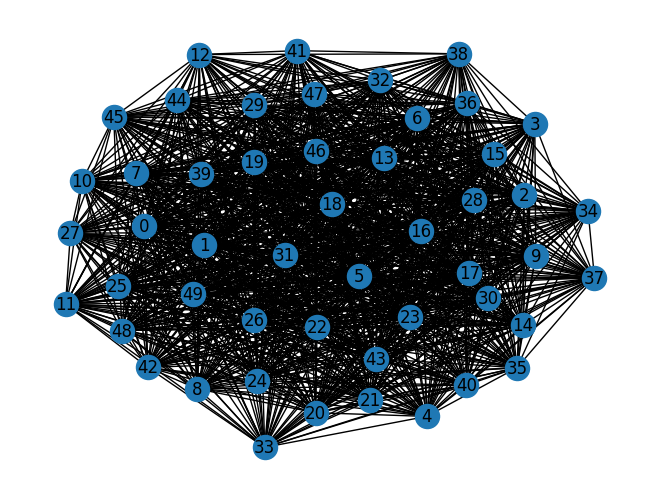

In [1314]:
G = createGraph(50,3000)

nx.draw(G, with_labels = True)


{(24, 25, 18, 13): 6, (25, 2, 34, 13): 6, (25, 2, 27, 31): 6, (25, 2, 27, 34): 6, (25, 18, 28, 13): 6, (9, 18, 13, 7): 6, (34, 27, 4, 39): 6, (25, 34, 27, 39): 6, (25, 34, 2, 13): 6, (27, 25, 34, 2): 6, (2, 25, 34, 27): 6, (13, 18, 24, 25, 28): 4, (2, 34, 13, 25, 27): 4, (2, 34, 25, 27, 31): 4, (2, 34, 39, 25, 27): 4, (34, 4, 39, 25, 27): 4, (34, 2, 39, 25, 27): 4, (34, 2, 13, 25, 27): 4, (34, 2, 25, 27, 31): 4, (25, 2, 34): 3, (2, 34, 36): 3, (4, 12, 30): 3, (12, 4, 14): 3, (2, 27, 34): 3, (10, 7, 31): 3, (4, 12, 39): 3, (27, 15, 7): 3, (27, 31, 7): 3, (36, 7, 15): 3, (26, 15, 7): 3, (34, 2, 36): 3, (2, 34, 13): 3, (24, 20, 13): 3, (9, 20, 13): 3, (2, 13, 30): 3, (19, 35, 38): 3, (10, 35, 12): 3, (10, 35, 23): 3, (19, 34, 3): 3, (36, 37, 38): 3, (25, 34, 39): 3, (32, 34, 39): 3, (2, 37, 30): 3, (11, 29, 30): 3, (29, 30, 15): 3, (37, 21, 6): 3, (37, 38, 39): 3, (37, 6, 39): 3, (27, 4, 39): 3, (24, 18, 37): 3, (34, 27, 39): 3, (2, 36, 37): 3, (11, 12, 30): 3, (12, 4, 30): 3, (11, 13, 30

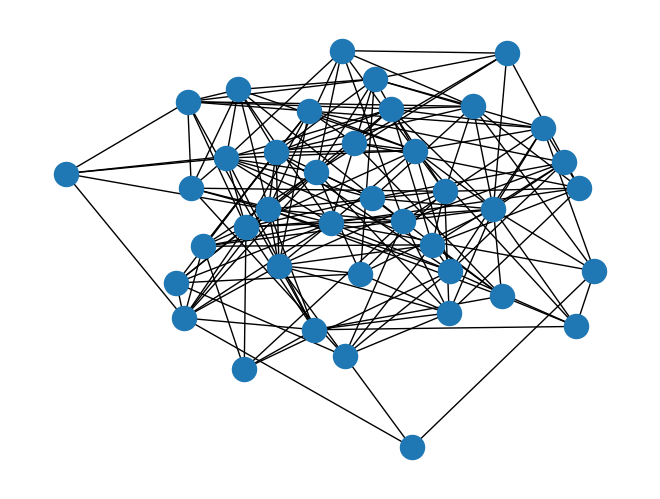

In [1321]:
G = createGraph(40,200)
nx.draw(G)
population = init_population(G)
repeat_c = 0
best_value = -100
while True:
    fitness(population,G)
    population = selection(population,G)
    tmp = population.get(list(population)[0])
    if(tmp == best_value):
        repeat_c += 1
    else:
        best_value = tmp
        repeat_c = 0

    if repeat_c > 5:
        break
    childs =recombination(population)
    childs = mutation(childs,G)
    population = childs | population

    

print(population)
print(len(list(population)[0]) == max(len(c) for c in nx.find_cliques(G)))
print(max(len(c) for c in nx.find_cliques(G)))   


In [1326]:
counter = 0
for i in range(100):
    n_nodes = np.random.randint(10,50)
    n_edges = np.random.randint(n_nodes,500)
    G = createGraph(n_nodes,n_edges)
    population = init_population(G)
    repeat_c = 0
    best_value = -100
    while True:
        fitness(population,G)
        population = selection(population,G)
        tmp = population.get(list(population)[0])
        if(tmp == best_value):
            repeat_c += 1
        else:
            best_value = tmp
            repeat_c = 0

        if repeat_c > 5:
            break


        childs = mutation(recombination(population),G)
        population = population | childs

        

    print(population)

    if not len(list(population)[0]) == max(len(c) for c in nx.find_cliques(G)):
        counter += 1

    print(max(len(c) for c in nx.find_cliques(G)))

print((100-counter)/100) 

{(33, 6, 7, 8, 24, 30): 15, (33, 6, 7, 24, 30): 10, (33, 7, 8, 24, 30): 10, (6, 7, 8, 24, 30): 10, (33, 6, 7, 39, 30): 10, (33, 6, 7, 8, 24): 10, (33, 6, 8, 24, 30): 10, (33, 6, 7, 8, 30): 10, (8, 43, 11, 44, 30): 10, (33, 6, 39, 7, 30): 10, (8, 11, 43, 44, 30): 10, (33, 6, 39, 7, 24, 30): 8, (33, 6, 39, 8, 7, 30): 8, (33, 6, 7, 39, 24, 30): 8, (33, 6, 7, 8, 39, 30): 8, (27, 4, 38, 7): 6, (24, 33, 13, 7): 6, (24, 30, 6, 7): 6, (24, 13, 38, 7): 6, (1, 43, 36, 44): 6, (26, 4, 38, 7): 6, (33, 7, 13, 39): 6, (24, 13, 45, 7): 6, (27, 4, 21, 7): 6, (43, 4, 28, 38): 6, (28, 4, 37, 38): 6, (16, 28, 37, 38): 6, (16, 43, 28, 38): 6, (24, 33, 6, 7): 6, (4, 30, 6, 7): 6, (41, 12, 38, 15): 6, (16, 41, 38, 15): 6, (40, 27, 4, 7): 6, (37, 4, 28, 38): 6, (1, 11, 44, 43): 6, (43, 28, 4, 38): 6, (40, 33, 13, 7): 6, (26, 35, 29, 39): 6, (24, 45, 13, 7): 6, (26, 18, 35, 29): 6, (41, 34, 3, 42): 6, (37, 28, 4, 38): 6, (32, 29, 36, 5): 6, (8, 43, 11, 30): 6, (43, 11, 44, 30): 6, (43, 2, 11, 30): 6, (8, 43, 